### csv파일에서 데이터 불러와서 전처리
<hr>

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# from wordcloud import WordCloud  # pip install wordcloud

# 한글 깨짐 방지 (윈도우 기준, 환경에 따라 폰트 이름 조정 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'AppleGothic', 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# 1) CSV 불러오기
df = pd.read_csv("./naver_car_reviews_all_ffinal.csv")

# 2) 대략적인 구조 확인
print(df.shape)      # (행 개수, 열 개수)
print(df.columns)    # 컬럼 이름 확인
print(df.head())     # 앞부분 확인
print(df.info())     # 타입, 결측치 확인


(7527, 3)
Index(['car', 'score', 'content'], dtype='object')
                  car  score  \
0  2026 혼다 CR-V 하이브리드   8.67   
1  2026 혼다 CR-V 하이브리드   9.50   
2  2026 혼다 CR-V 하이브리드  10.00   
3  2026 혼다 CR-V 하이브리드  10.00   
4  2026 혼다 CR-V 하이브리드   9.67   

                                             content  
0  타보니까 최악의 단점이있는대, 휴대폰과 디스플레이 연결이 자주 끊기는현상이있어 가끔...  
1  + SUV에서 느껴지는 세단의 주행감. 롤링이 적고 단단한 하체. 시승하자마자 계획...  
2         디자인 연비 주행질감 정말좋아요 직접 타봐아 알수있어요 실연비가 훨씬 높아요  
3  싼타페, 라브4, glc 시승 후 주행성능, 승차감 등 모든 점에서 crvr가 마음...  
4   Everything is good! 디자인 정숙성 모두 만족합니다. 다음 차량은 어코드  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   car      7527 non-null   object 
 1   score    7517 non-null   float64
 2   content  7527 non-null   object 
dtypes: float64(1), object(2)
memory usage: 176.5+ KB
None


In [214]:
# 타입 확인
print(df['score'].describe())


count    7517.000000
mean        9.062916
std         0.936187
min         0.830000
25%         8.670000
50%         9.330000
75%         9.670000
max        10.000000
Name: score, dtype: float64


In [215]:
## ================================================
## 키워드 정의
## ================================================
# 부정 키워드
negative_keywords = [
    "떨림","진동","소음","시끄러","불편","답답","불만","문제","하자",
    "고장","버그","에러","연비","출력 부족","약함","느리","안됨",
    "부족","모자라","약하", "약한 편", "별로", "실망", "최악", "구림",
    "흔들림", "덜컹", "불안정", "불안하", "불친절", "짜증", "불쾌",
    "진동이 심", "소음이 심", "잡소리", "떨리는 느낌"
]

# SW 부정 키워드
sw_negative_keywords = [
    # 기본 SW/에러 계열
    "소프트웨어","SW","시스템","프로그램","버그","에러","오류","오작동","결함",
    # 동작 불능/먹통 계열
    "먹통","튕김","튕겨","멈춤","멈춰","멈추","버벅","버벅임","버벅거",'버버버버','어버버','버억',
    "렉","렉걸","렉 걸",'얍디',"지연","딜레이",
    # 알람/경고 계열
    "알람","경고","경고등","경고음","경고창",
    # 연결/끊김 계열
    "끊김","끊킴","끈킴","끊겨","끊어지",
    "연결이 안", "연결 안됨","접속 오류","접속이 안",    
    # 램프/제어 로직 쪽 (SW 제어 가능성)
    "오토라이트가 늦게","라이트가 자동으로 꺼","라이트가 혼자 켜",
    "헤드램프가 깜빡","전조등이 깜빡"
    # ADAS/크루즈/센서 계열
    "크루즈","스마트 크루즈","차선이탈","차로유지",
    "차선 이탈 경고","차선이탈 경고","차선 보조",
    "센서오류","센서 에러","센서가 이상","센서 오작동",
    "경고등이 자꾸","경고등이 괜히",
]

# 사용자 입력 키워드
input_negative_keywords = input('원하는 키워드 검색 (ex] 소음 불편 불편 ...)').strip().split()


# 부정키워드 + SW부정키워드 + 입력키워드
ret_keywords = list(set(negative_keywords + sw_negative_keywords + input_negative_keywords))


## ================================================
## 리뷰 부정 판별 함수
## ================================================
def is_negative_review(text):
    if not isinstance(text, str):
        return False
    return any(word in text for word in ret_keywords)

def input_negative_review(text):
    if not isinstance(text, str):
        return False
    return any(word in text for word in input_negative_keywords)

df["is_negative"] = df["content"].apply(is_negative_review)
df["input_negative"] = df["content"].apply(input_negative_review)

display(df)
print('부정 단어 개수 :',df.is_negative.sum())
print('입력 부정 단어 개수 :',df.input_negative.sum())


,car,score,content,is_negative,input_negative
0,2026 혼다 CR-V 하이브리드,8.67,"타보니까 최악의 단점이있는대, 휴대폰과 디스플레이 연결이 자주 끊기는현상이있어 가끔...",True,False
1,2026 혼다 CR-V 하이브리드,9.50,+ SUV에서 느껴지는 세단의 주행감. 롤링이 적고 단단한 하체. 시승하자마자 계획...,True,False
2,2026 혼다 CR-V 하이브리드,10.00,디자인 연비 주행질감 정말좋아요 직접 타봐아 알수있어요 실연비가 훨씬 높아요,True,False
3,2026 혼다 CR-V 하이브리드,10.00,"싼타페, 라브4, glc 시승 후 주행성능, 승차감 등 모든 점에서 crvr가 마음...",True,False
4,2026 혼다 CR-V 하이브리드,9.67,Everything is good! 디자인 정숙성 모두 만족합니다. 다음 차량은 어코드,False,False
...,...,...,...,...,...
7522,2026 기아 카니발 하이리무진,9.67,매우좋음 차가너무크다는게 단점이자 장점임 그것말고는 아주좋음 디자인이며 공간이며 너무좋음,False,False
7523,2026 기아 카니발 하이리무진,7.50,고속연비는 12km이상나와서 좋고 시내연비는 어쩔수 없어요 그대신 디자인 좋아지고 ...,True,False
7524,2026 기아 카니발 하이리무진,9.17,페리후 각종 옵션 및 하부 서스펜션 교체등 보조기능은 좋아졌으나 가격이 사악함,False,False
7525,2026 기아 카니발 하이리무진,8.67,생각보다 연비 잘나옴 차 가격대비 이만한 패밀리카는 없는듯 전자장비가 많아 눈많이오...,True,False


부정 단어 개수 : 3614
입력 부정 단어 개수 : 0


In [216]:
# 사용자 입력
car_input = input("차량의 이름 (예: '2026 BMW X5'): ").strip()

# 차량 이름에 입력 문자열이 포함된 행만 가져오기 (대소문자 무시)
mask = df["car"].str.contains(car_input, case=False, na=False)
df_car = df[mask]

print(f"'{car_input}' 이(가) 포함된 차량 리뷰 개수:", len(df_car))

if len(df_car) == 0:
    print("해당 이름을 포함한 차량 리뷰가 없습니다.")

df_car_neg = df_car[df_car["is_negative"]]
print("그 중 부정 리뷰 개수:", len(df_car_neg))

df_car_neg_input = df_car[df_car["input_negative"]]
print('*'*20)
print("입력 부정 리뷰 개수:", len(df_car_neg_input))


'' 이(가) 포함된 차량 리뷰 개수: 7527
그 중 부정 리뷰 개수: 3614
********************
입력 부정 리뷰 개수: 0


In [217]:
# df_car_neg : 특정 차종 + 특정 부정 리뷰만 필터링 된 상태라고 가정

# 파일 이름 깔끔하게 만들기 (공백 → 언더바)
safe_car_name = car_input.replace(" ", "_").replace("/", "_")
filename = f"./negative_review/all_negative_reviews_{safe_car_name}.csv"
filename_input = f"./negative_review/input_negative_reviews_{safe_car_name}.csv"

df_car_neg.to_csv(filename, index=False, encoding="utf-8-sig")
df_car_neg_input.to_csv(filename_input, index=False, encoding="utf-8-sig")

print(f"모든 부정 리뷰를 '{filename}' 파일로 저장하고, 키워드 부정리뷰를 {filename_input} 파일로 저장했습니다.")


모든 부정 리뷰를 './negative_review/all_negative_reviews_.csv' 파일로 저장하고, 키워드 부정리뷰를 ./negative_review/input_negative_reviews_.csv 파일로 저장했습니다.


## 리뷰에서 많이 사용된 단어 개수 출력 <hr>

In [218]:
# 분석에 사용할 데이터프레임 선택 (전체 리뷰)
target_df = df_car 
# target_df = df

# 모든 리뷰 내용 합치기
text = " ".join(target_df["content"].astype(str))

# 간단한 전처리: 특수문자 제거, 공백 정리
text_clean = re.sub(r"[^가-힣0-9a-zA-Z\s]", " ", text)
text_clean = re.sub(r"\s+", " ", text_clean)

# 공백 기준으로 단어 나누기
words = text_clean.split()

In [219]:
# 쓸모x
stopwords = ["그리고","하지만","그래도","정도","조금","너무","좀","이거","저는","제가","에는","에서"]

# 조사 제거 함수
josa_list = [
    "에는", "에서", "으로는", "으로도", "으로", "까지", "부터", "만큼", "마저",
    "은", "는", "이", "가", "을", "를", "도", "만", "에"
]
josa_list = sorted(josa_list, key=len, reverse=True)

def strip_josa(word: str):
    for josa in josa_list:
        if word.endswith(josa) and len(word) > len(josa):
            return word[:-len(josa)]
    return word

In [220]:
# 짧은 단어 제거 + 조사 제거 후 다시 필터링
clean_words = []
for w in words:
    if w in stopwords:
        continue
    if len(w) <= 1:
        continue
    base = strip_josa(w)
    if len(base) <= 1:   # 조사 떼고 한 글자밖에 안 남으면 버리기
        continue
    clean_words.append(base)

# 단어 빈도 세기
counter = Counter(clean_words)
print("단어 상위 20개:")
print(counter.most_common(20))

단어 상위 20개:
[('연비', 2489), ('디자인', 1719), ('승차감', 1053), ('가격', 737), ('만족합니다', 706), ('차량', 631), ('성능', 614), ('좋고', 614), ('좋습니다', 601), ('주행성능', 589), ('정말', 503), ('있습니다', 501), ('좋아요', 485), ('타고', 468), ('주행', 465), ('옵션', 444), ('매우', 434), ('가성비', 419), ('실내', 417), ('아주', 413)]


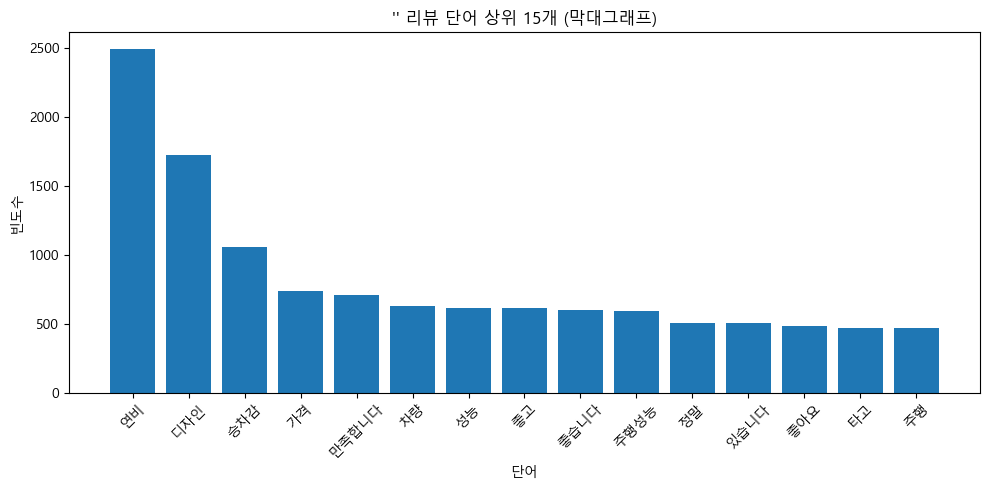

In [221]:
# 상위 N개만 막대그래프로
N = 15
most_common = counter.most_common(N)
words_top = [w for w, c in most_common]
counts_top = [c for w, c in most_common]

plt.figure(figsize=(10, 5))
plt.bar(words_top, counts_top)
plt.title(f"'{car_input}' 리뷰 단어 상위 {N}개 (막대그래프)")
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
